In [1]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob, os

In [2]:
emb_ids = []
avg_embs = []

for emb_path in glob.glob('../avg_bird_embeddings/*'):
    emb_id = os.path.basename(emb_path).replace('.npy', '')
    avg_emb = np.load(emb_path)
    
    emb_ids.append(emb_id)
    avg_embs.append(avg_emb)

emb_ids = np.array(emb_ids)
emb_ids = emb_ids.astype(int)
avg_embs = np.array(avg_embs)

In [3]:
rec_df = pd.read_csv('../preprocess_data/species_and_record_url.csv')
species_df = pd.read_csv('../preprocess_data/species_keys.csv')
species = np.unique(species_df['species_id'].values).tolist()
# loop over every bird type, find rec ids matching that bird type, color based on those idx
species_id_dict = {}
for s in species:
    recording_matches = rec_df.loc[rec_df['species_id'] == int(s), 'recording_id'].values
    species_specific_ids = []
    new_idx = 0
    for id in emb_ids.tolist():
        if id in recording_matches:
            species_specific_ids.append(new_idx)
        new_idx += 1
    species_id_dict[int(s)] = species_specific_ids
    
print(species_id_dict)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [1131, 1467, 1753, 2305], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [551], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [717], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [2384], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [712, 762, 1717], 56: [], 57: [], 58: [1382], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [254, 383, 526, 701, 1057, 1921, 2105, 2156, 2390, 2723], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [24, 2467], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [285, 444, 1699], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: [], 103: [1485, 1665], 104: [], 105: [], 106: [], 107: [], 1

In [4]:
tsne_comps = TSNE(n_components=2, perplexity=50).fit_transform(avg_embs)

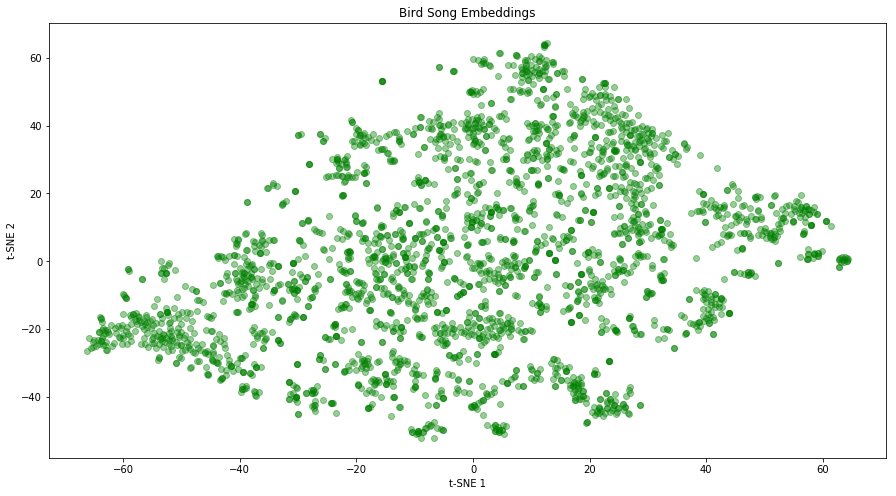

In [5]:
f = plt.figure(figsize=(15,8))
plt.title('Bird Song Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.scatter(tsne_comps[:, 0], tsne_comps[:, 1], alpha=0.4, c='g')

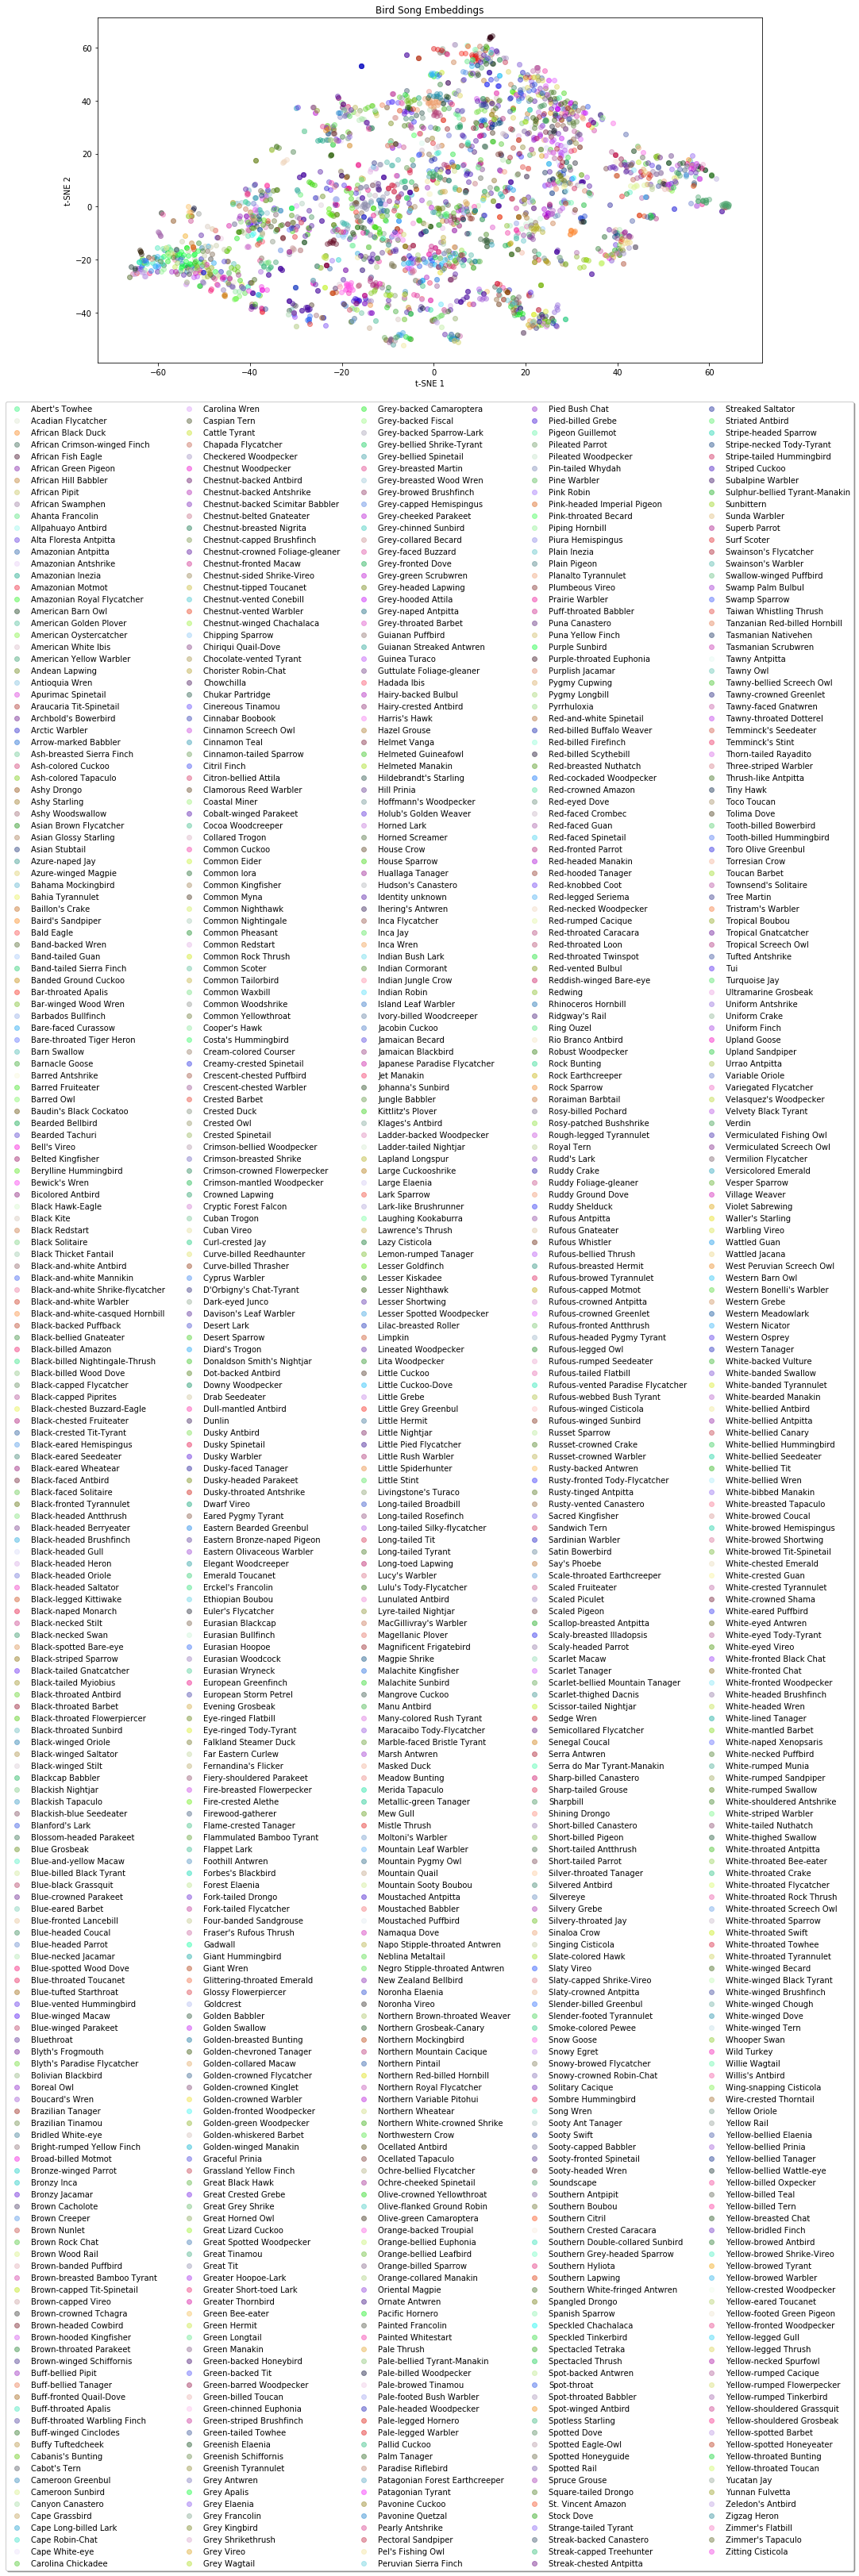

In [6]:
f = plt.figure(figsize=(15,8))
plt.title('Bird Song Embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
for species in species_id_dict:
    if len(species_id_dict[species]) > 0:
        bird_type = species_df.loc[species_df['species_id'] == species, 'common_name'].values
        bird_type = bird_type[0]
        plt.scatter(
            tsne_comps[species_id_dict[species], 0], 
            tsne_comps[species_id_dict[species], 1], 
            alpha=0.4, 
            c=np.random.rand(1,3),
            label=bird_type
        )
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=5)
plt.show()